# 6: Apply Naive Bayes on DonorChoose dataset

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas as pd
data = pd.read_csv('preprocessed_data.csv')
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [3]:
from sklearn.model_selection import train_test_split
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
print('shape of X_train and X_test before vectorization')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

bow_vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
bow_vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = bow_vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = bow_vectorizer.transform(X_test['essay'].values)

print("After vectorization")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_train.shape)


shape of X_train and X_test before vectorization
(76473, 8) (76473,)
(32775, 8) (32775,)
After vectorization
(76473, 5000) (76473,)
(32775, 5000) (76473,)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
tfidf_vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
tfidf_vectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf = tfidf_vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = tfidf_vectorizer.transform(X_test['essay'].values)

print("After tf-idf vectorization")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After tf-idf vectorization
(76473, 5000) (76473,)
(32775, 5000) (32775,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
# school_state

vectorizer_st = CountVectorizer(binary=True)
vectorizer_st.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer_st.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_st.transform(X_test['school_state'].values)

print("After school state vectorization")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_st.get_feature_names_out())

After school state vectorization
(76473, 51) (76473,)
(32775, 51) (32775,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [7]:
# teacher_prefix
from sklearn.preprocessing import OneHotEncoder

encoder_tprefix = OneHotEncoder()

# reshape input data to 2D array with a single feature
X_train_tprefix_reshaped = X_train['teacher_prefix'].values.reshape(-1, 1)
X_test_tprefix_reshaped = X_test['teacher_prefix'].values.reshape(-1, 1)

#fit and transform the training data
X_train_encoded_tprefix = encoder_tprefix.fit_transform(X_train_tprefix_reshaped)
#transform the test data
X_test_encoded_tprefix = encoder_tprefix.transform(X_test_tprefix_reshaped)

#print information about the encoded data
print("Teacher prefix after vectorization")
print(X_train_encoded_tprefix.shape, y_train.shape)
print(X_test_encoded_tprefix.shape, y_test.shape)
print(encoder_tprefix.get_feature_names_out())

print(X_train_encoded_tprefix[:5])

Teacher prefix after vectorization
(76473, 5) (76473,)
(32775, 5) (32775,)
['x0_dr' 'x0_mr' 'x0_mrs' 'x0_ms' 'x0_teacher']
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 2)	1.0


In [8]:
#project_grade_category
vectorizer_pgc = CountVectorizer()
X_train_pgc_ohe = vectorizer_pgc.fit_transform(X_train['project_grade_category'].values)

X_test_pgc_ohe = vectorizer_pgc.transform(X_test['project_grade_category'].values)

#print project grade information after encoding the data
print("Project grade category after vectorization")
print(X_train_pgc_ohe.shape, y_train.shape)
print(X_test_pgc_ohe.shape, y_test.shape)
print(vectorizer_pgc.get_feature_names_out())

print(X_train_pgc_ohe[:5])

Project grade category after vectorization
(76473, 4) (76473,)
(32775, 4) (32775,)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']
  (0, 2)	1
  (1, 0)	1
  (2, 3)	1
  (3, 0)	1
  (4, 0)	1


In [9]:
#clean_categories
vectorizer_cc = CountVectorizer(binary=True)
X_train_cc_ohe = vectorizer_cc.fit_transform(X_train['clean_categories'].values)

X_test_cc_ohe = vectorizer_cc.transform(X_test['clean_categories'].values)

#print clean_categories information after encoding the data
print("Project clean categories information after encoding the data")
print(X_train_cc_ohe.shape, y_train.shape)
print(X_test_cc_ohe.shape, y_test.shape)
print(vectorizer_cc.get_feature_names_out())

Project clean categories information after encoding the data
(76473, 9) (76473,)
(32775, 9) (32775,)
['appliedlearning' 'care_hunger' 'health_sports' 'history_civics'
 'literacy_language' 'math_science' 'music_arts' 'specialneeds' 'warmth']


In [10]:
#clean_subcategories
vectorizer_csc = CountVectorizer(binary=True)
X_train_csc_ohe = vectorizer_csc.fit_transform(X_train['clean_subcategories'].values)

X_test_csc_ohe = vectorizer_csc.transform(X_test['clean_subcategories'].values)

print("Project clean sub categories information after encoding the data")
print(X_train_csc_ohe.shape, y_train.shape)
print(X_test_csc_ohe.shape, y_test.shape)
print(vectorizer_csc.get_feature_names_out())

Project clean sub categories information after encoding the data
(76473, 30) (76473,)
(32775, 30) (32775,)
['appliedsciences' 'care_hunger' 'charactereducation' 'civics_government'
 'college_careerprep' 'communityservice' 'earlydevelopment' 'economics'
 'environmentalscience' 'esl' 'extracurricular' 'financialliteracy'
 'foreignlanguages' 'gym_fitness' 'health_lifescience' 'health_wellness'
 'history_geography' 'literacy' 'literature_writing' 'mathematics' 'music'
 'nutritioneducation' 'other' 'parentinvolvement' 'performingarts'
 'socialsciences' 'specialneeds' 'teamsports' 'visualarts' 'warmth']


In [11]:
from sklearn.preprocessing import StandardScaler

sScaler_price = StandardScaler()

sScaler_price.fit(X_train['price'].values.reshape(-1, 1))

X_train_price = sScaler_price.transform(X_train['price'].values.reshape(-1, 1))
X_test_price = sScaler_price.transform(X_test['price'].values.reshape(-1, 1))


print("Price after performing Standard Scaler")
print(X_train_price.shape, y_train.shape)
print(X_test_price.shape, y_test.shape)
print(X_train_price[:5])

Price after performing Standard Scaler
(76473, 1) (76473,)
(32775, 1) (32775,)
[[-0.41389112]
 [ 0.24601805]
 [-0.64504621]
 [-0.37949546]
 [ 0.42474007]]


In [12]:
#encoding numerical feature price with Normalizer
from sklearn.preprocessing import Normalizer

normalizer_price = Normalizer()

X_train_price_norm = normalizer_price.fit_transform(X_train['price'].values.reshape(1, -1)).reshape(-1, 1)
X_test_price_norm = normalizer_price.fit_transform(X_test['price'].values.reshape(1, -1)).reshape(-1, 1)

print("After vectorizing Numerical feature Price with Normalizer")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print(X_train_price_norm[:5])

After vectorizing Numerical feature Price with Normalizer
(76473, 1) (76473,)
(32775, 1) (32775,)
[[0.00110743]
 [0.00296401]
 [0.0004571 ]
 [0.00120419]
 [0.00346682]]


In [13]:
#teacher_number_of_previously_posted_projects using StandardScaler
sScaler_tnoppp = StandardScaler()

sScaler_tnoppp.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

X_train_tnoppp_ss = sScaler_tnoppp.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnoppp_ss = sScaler_tnoppp.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("After vectorizing Teacher number of previously posted projects using Standard scaler")
print(X_train_tnoppp_ss.shape, y_train.shape)
print(X_test_tnoppp_ss.shape, y_test.shape)
print(X_train_tnoppp_ss[:5])

After vectorizing Teacher number of previously posted projects using Standard scaler
(76473, 1) (76473,)
(32775, 1) (32775,)
[[-0.33050513]
 [-0.40265996]
 [-0.29442771]
 [-0.04188581]
 [-0.33050513]]


In [14]:
#teacher_number_of_previously_posted_projects using Normalizer()

normalizer_tnoppp = Normalizer()

X_train_tnoppp_norm = normalizer_tnoppp.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_tnoppp_norm = normalizer_tnoppp.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)


print("Teacher number of previously posted projects feature after Normalizing..")
print(X_train_tnoppp_norm.shape, y_train.shape)
print(X_test_tnoppp_norm.shape, y_test.shape)
print(X_train_tnoppp_norm[:5])

Teacher number of previously posted projects feature after Normalizing..
(76473, 1) (76473,)
(32775, 1) (32775,)
[[0.00024204]
 [0.        ]
 [0.00036306]
 [0.00121019]
 [0.00024204]]


In [15]:
#concatinating all the features with X_train essay bow
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_encoded_tprefix, X_train_pgc_ohe, X_train_cc_ohe, X_train_csc_ohe, X_train_price_norm, X_train_tnoppp_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_encoded_tprefix, X_test_pgc_ohe, X_test_cc_ohe, X_test_csc_ohe, X_test_price_norm, X_test_tnoppp_norm)).tocsr()


print("Final Data Matrix:")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data Matrix:
(76473, 5101) (76473,)
(32775, 5101) (32775,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

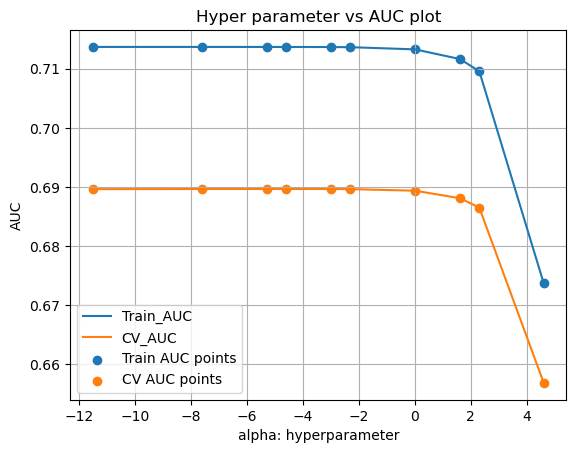

Best Alpha value is:  0.01  and the best score is:  0.6896704336810776


In [16]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
import numpy as np
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt

mnb = MultinomialNB()
#mnb = MultinomialNB(class_prior = [0.5, 0.5])
parameters = {'alpha' : [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}
clf = RandomizedSearchCV(mnb, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(by='param_alpha')

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']
alpha = results['param_alpha']

#log(alpha) on your X-axis so that it will be more readable
alpha_log = np.log(alpha.astype(float))

plt.plot(alpha_log, train_auc, label='Train_AUC')

plt.plot(alpha_log, cv_auc, label='CV_AUC')

plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter vs AUC plot")
plt.grid()
plt.show()

print("Best Alpha value is: ", clf.best_params_['alpha'], " and the best score is: ", clf.best_score_)


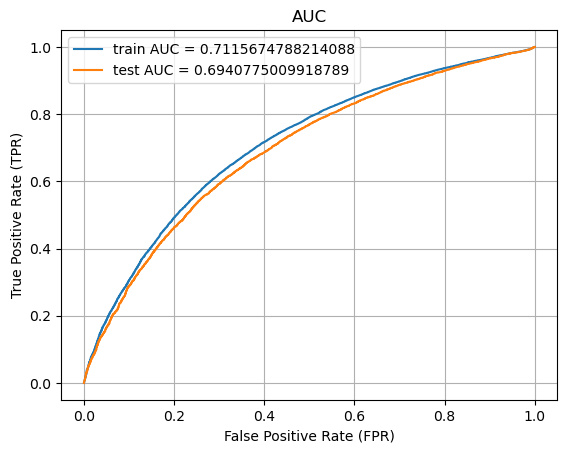

In [23]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

from sklearn.metrics import roc_curve, auc

best_alpha_bow = 0.01
mnb_using_bow = MultinomialNB(alpha=best_alpha_bow)
mnb_using_bow.fit(X_tr, y_train)

y_train_pred = mnb_using_bow.predict_proba(X_tr)[:,1]
y_test_pred = mnb_using_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

test_auc_bow = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [24]:
def find_best_threshold(threshold, fpr, tpr):
    #(tpr*(1-fpr) will be maximum for very low fpr and very high tpr)
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr) ", max(tpr*(1-fpr)), "for threshold ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i >= threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr)  0.43761206384136425 for threshold  0.861
Train confusion matrix
[[ 7826  3753]
 [22877 42017]]
Test confusion matrix
[[ 3242  1721]
 [10036 17776]]


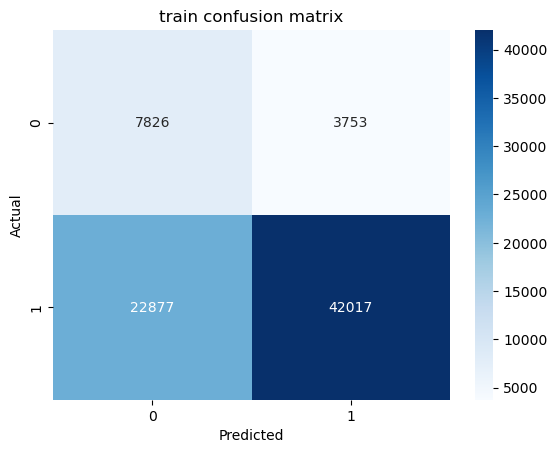

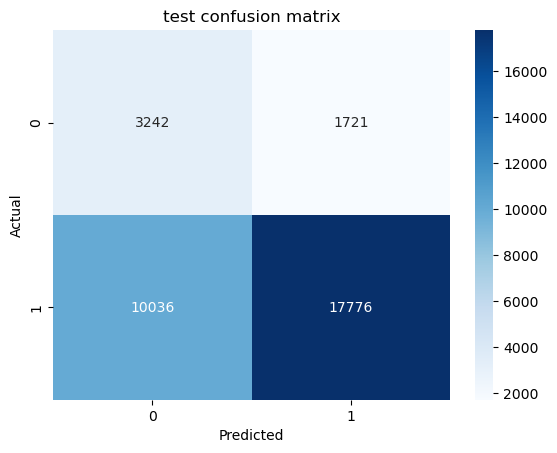

In [25]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(train_confusion_matrix)

print("Test confusion matrix")
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(test_confusion_matrix)

print("="*100)
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("train confusion matrix")
plt.show()

print("="*100)
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("test confusion matrix")
plt.show()

#### Set 2

In [26]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from scipy.sparse import hstack
X_tr_t = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_encoded_tprefix, X_train_pgc_ohe, X_train_cc_ohe, X_train_csc_ohe, X_train_price_norm, X_train_tnoppp_norm)).tocsr()
X_te_t = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_encoded_tprefix, X_test_pgc_ohe, X_test_cc_ohe, X_test_csc_ohe, X_test_price_norm, X_test_tnoppp_norm)).tocsr()


print("Final Data Matrix:")
print(X_tr_t.shape, y_train.shape)
print(X_te_t.shape, y_test.shape)


Final Data Matrix:
(76473, 5101) (76473,)
(32775, 5101) (32775,)


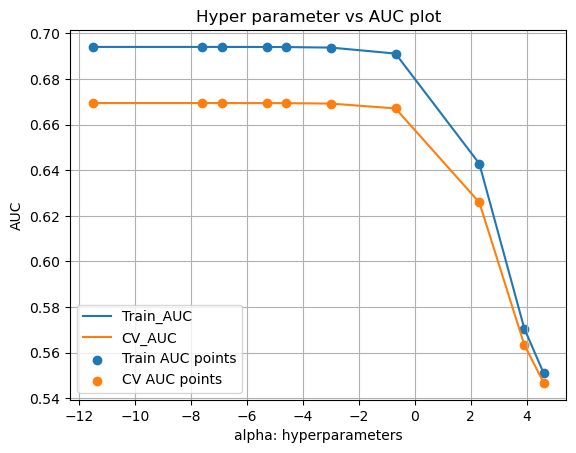

Best Alpha value is:  1e-05  and the best score is:  0.6896704336810776


In [27]:
mnb_tfidf = MultinomialNB()
parameters = {'alpha' : [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}
clf_tf_idf = RandomizedSearchCV(mnb_tfidf, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf_tf_idf.fit(X_tr_t, y_train)

results = pd.DataFrame.from_dict(clf_tf_idf.cv_results_)
results = results.sort_values(by='param_alpha')

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']
alpha = results['param_alpha']


#log(alpha) on your x-axis so that it will be more readable
alpha_log = np.log(alpha.astype(float))

plt.plot(alpha_log, train_auc, label='Train_AUC')
plt.plot(alpha_log, cv_auc, label='CV_AUC')

plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameters")
plt.ylabel("AUC")
plt.title("Hyper parameter vs AUC plot")
plt.grid()
plt.show()

print("Best Alpha value is: ", clf_tf_idf.best_params_['alpha'], " and the best score is: ", clf.best_score_)

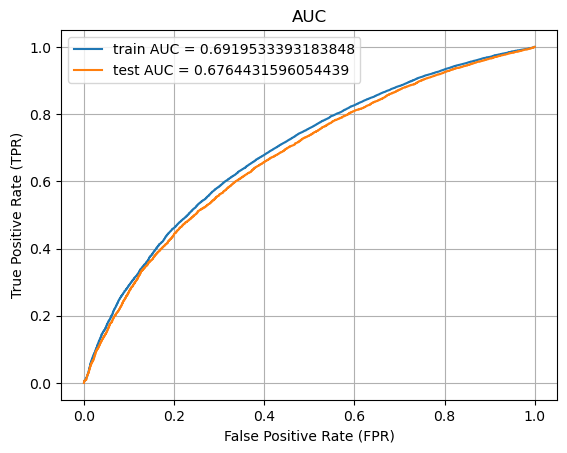

In [28]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
best_alpha_tfidf = clf_tf_idf.best_params_['alpha']
mnb_using_tfidf = MultinomialNB(alpha=best_alpha_tfidf)
mnb_using_tfidf.fit(X_tr_t, y_train)


y_train_pred = mnb_using_tfidf.predict_proba(X_tr_t)[:,1]
y_test_pred = mnb_using_tfidf.predict_proba(X_te_t)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

test_auc_tfidf = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC")
plt.grid()
plt.show()




the maximum value of tpr*(1-fpr)  0.4134100337171717 for threshold  0.85
Train confusion matrix using TF-IDF
[[ 7607  3972]
 [24058 40836]]
Test confusion matrix using TF-IDF
[[ 3155  1808]
 [10438 17374]]


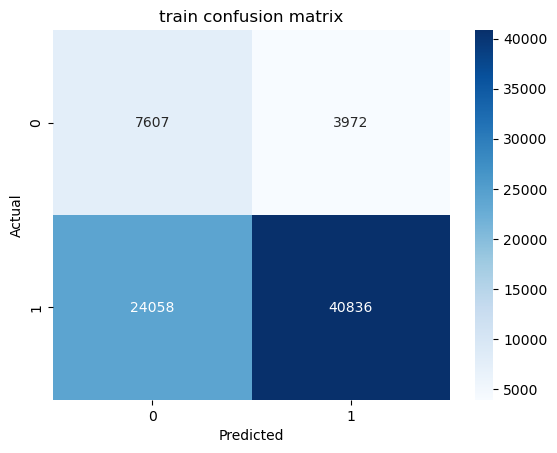

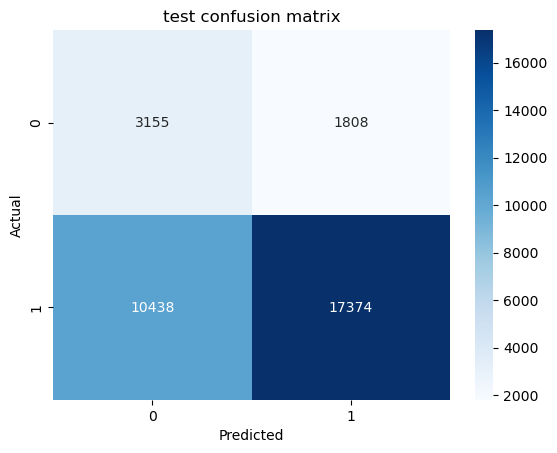

In [29]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Train confusion matrix using TF-IDF")
train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(train_confusion_matrix)


print("Test confusion matrix using TF-IDF")
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(test_confusion_matrix)

print("="*100)
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("train confusion matrix")
plt.show()

print("="*100)
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("test confusion matrix")
plt.show()

In [32]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)

#creating a list to append all the features names that we created before
all_features_set = []

for feature_name in tfidf_vectorizer.get_feature_names_out():
    all_features_set.append(feature_name)
    
for feature_name in vectorizer_st.get_feature_names_out():
    all_features_set.append(feature_name)
    
for feature_name in encoder_tprefix.get_feature_names_out():
    all_features_set.append(feature_name)
    
for feature_name in vectorizer_pgc.get_feature_names_out():
    all_features_set.append(feature_name)
    
for feature_name in vectorizer_cc.get_feature_names_out():
    all_features_set.append(feature_name)

for feature_name in vectorizer_csc.get_feature_names_out():
    all_features_set.append(feature_name)
    
all_features_set.append("teacher_tnoppp")

all_features_set.append("price")


print("total number of features of set2: ", len(all_features_set))
print("="*100)
top_features_positive = np.argsort(mnb_using_tfidf.feature_log_prob_[1])[-20:]

print("\nTop 20 positive features:")
print("-"*30)
for i in top_features_positive:
    print(all_features_set[i])
    
print("="*100)
top_features_negative = np.argsort(mnb_using_tfidf.feature_log_prob_[0])[-20:]

print("\nTop 20 negative features:")
for i in top_features_negative:
    print(all_features_set[i])




total number of features of set2:  5101

Top 20 positive features:
------------------------------
health_wellness
x0_mr
appliedsciences
grades_9_12
appliedlearning
specialneeds
specialneeds
students
health_sports
ca
grades_6_8
literature_writing
mathematics
literacy
grades_3_5
x0_ms
math_science
grades_prek_2
literacy_language
x0_mrs

Top 20 negative features:
music_arts
x0_mr
grades_9_12
appliedsciences
students
appliedlearning
ca
health_sports
specialneeds
specialneeds
grades_6_8
literature_writing
literacy
mathematics
grades_3_5
x0_ms
math_science
grades_prek_2
literacy_language
x0_mrs


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [33]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter (Alpha)", "AUC"]

x.add_row(["BOW", "Multinomial Naive Bayes", best_alpha_bow, round(test_auc_bow,2)])
x.add_row(["TF-IDF", "Multinomial Naive Bayes", best_alpha_tfidf, round(test_auc_tfidf,2)])
print(x)

+------------+-------------------------+-------------------------+------+
| Vectorizer |          Model          | Hyper Parameter (Alpha) | AUC  |
+------------+-------------------------+-------------------------+------+
|    BOW     | Multinomial Naive Bayes |           0.01          | 0.69 |
|   TF-IDF   | Multinomial Naive Bayes |          1e-05          | 0.68 |
+------------+-------------------------+-------------------------+------+
